# Upload of a product to the gallery (oda api v1.1.31)

This notebooks documents the functionality for uploading a data product over the data-product gallery.

Two examples are hereby described: one for creating and uploading an image product and one for creating and uploading a lighte-curve one. For each of these products the functionalities from the `oda_api.ploot_tools` ( [Show and Save Products](Show_and_Save_Products.html)) are used.

All the possible input parameters, as well as the logic and rules applied, are described.

*author: Gabriele Barni (gabriele.barni@unige.ch)*

In [1]:
from oda_api.api import DispatcherAPI
from oda_api.plot_tools import OdaImage, OdaLightCurve
from oda_api.data_products import BinaryData
import os

from importlib import reload

from oda_api.token import discover_token

import logging
logging.getLogger('oda_api').addHandler(logging.StreamHandler())
logging.getLogger().setLevel(logging.INFO)

**Connection to the dispatcher**

In [2]:
disp=DispatcherAPI(url='https://www.astro.unige.ch/mmoda/dispatch-data',instrument='mock')

### Parameters for a data product

**The following parameters can be set:**

* **product_title**: title to assign to the product, in case this is not provided one is automatically built using the name of the source and the type of product
* **observation**: this can be indicated in two different ways
 * by specifying the id of an already present observation (eg 'test observation')
 * by specifying the time range, in particular the value of `T1` and `T2` in the following format `'2003-03-15T23:27:40.0'`
* **produced_by**: direct link to the notebook used to generated the product
* **gallery_image_path**: path of the generated image and to be uploaded over the gallery
* **fits_file_path**: a list of fits file links used for the generation of the product to upload over the gallery
* **token**: user token
* **insert_new_source**: a boolean value to specify if, in case a source currently not available on the product gallery is passed within the parameters, this will be created and then used for the newly created data product
* **validate_source**: a boolean value to specify if, in case a source is passed within the parameters, this will be validated against an online service
* **force_insert_not_valid_new_source**: a boolean value to specify if, in case a source is passed within the parameters and its validation fails, this should be provided as a parameter for the data product
* **apply_fields_source_resolution**: a boolean value to specify if, in case a source is passed within the parameters and then successfully validated, to apply the parameters values returned from the validation (an example of these parameters are RA and DEC)
* **kwargs**: keyword arguments representing the parameters values used to generate the product. Amongst them it is important to mention the following
 * **instrument**: name of the instrument used for the generated product (e.g. isgri, jemx1)
 * **product_type**: type of product generated (e.g. isgri_lc, jemx_image)
 * **src_name**: name of a known source (eg Crab, Cyg X-1)
 * **others**: other parameters used for the product (e.g. RA=25). Not all the parameters are currently supported, but the list of the supported ones will be extended

**Let's get the token**

In [3]:
token = discover_token()

found token in file in home your token payload: {
    "email": "Gabriele.Barni@unige.ch",
    "exp": 1651319627,
    "name": "gbarni",
    "roles": "authenticated user, user manager, general, integral-private-qla, magic, unige-hpc-full, public-pool-hpc, antares, sdss, apc, bitp, renku contributor, gallery contributor",
    "sub": "Gabriele.Barni@unige.ch"
}
token expires in 95.4 h


### Example of an image product
**Let's get a dummy image product**

In [4]:
tstart='2003-03-15T23:27:40.0'
tstop='2023-03-16T00:03:12.0'
source_name='OAO 1657-415'
E1_keV=28.
E2_keV=50.
RA=50
DEC=45
detection_threshold=5.0

instrument='isgri'
product_type='isgri_image'

data_collection=disp.get_product(instrument=instrument,
                                 product=product_type,
                                 T1='2003-03-15T23:27:40.0',
                                 T2='2023-03-16T00:03:12.0',
                                 integral_data_rights="public",
                                 osa_version='OSA11.2',
                                 RA=50,
                                 DEC=45,
                                 max_pointings=1,
                                 detection_threshold=detection_threshold,
                                 radius=15.,
                                 product_type='Dummy',
                                 token=token
                                )

please beware that by default, in a typical setup, oda_api will not output much. To learn how to increase the verbosity, please refer to the documentation: https://oda-api.readthedocs.io/en/latest/user_guide/ScienceWindowList.html?highlight=logging#Let's-get-some-logging . 
To disable this message you can pass `.get_product(..., silent=True)`
- waiting for remote response (since 2022-04-26 14:28:15), please wait for https://www.astro.unige.ch/mmoda/dispatch-data/run_analysis
session: T6K0WC5K3WZZWLF1 job: 59a4d18b65b40a0f

... query status prepared => done
... assigned job id: 59a4d18b65b40a0f
query COMPLETED SUCCESSFULLY (state done)
query complete: terminating


**Let's upload the data product over the gallery**

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
Set MJD-OBS to 54735.165023 from DATE-OBS.
Set MJD-END to 54735.638125 from DATE-END'. [astropy.wcs.wcs]
/home/gabriele/Workspace/oda_api/oda_api/plot_tools.py:134: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("gist_earth").copy()
  self.cs.cmap.set_under('k')
Applying the policy for the product isgri_image

A policy for the product_type isgri_image could not be applied

Searching the object OAO 1657-415

 name: OAO 1657-415, 
OAO 1657-415 successfully resolved

Source OAO 1657-415 was successfully validated

Product successfully posted on the gallery, at the link http://cdciweb02.internal.odahub.io/mmoda/gallery/node/2632
Using the above link you can modify the newly created

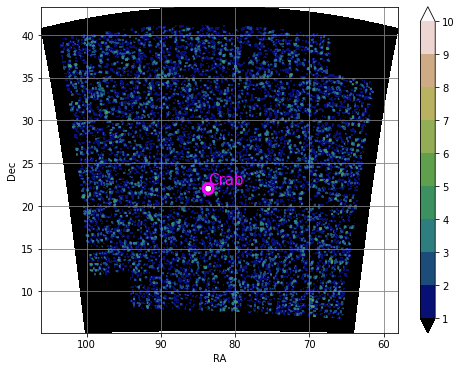

In [5]:
image_product = OdaImage(data_collection)
img_fn = image_product.get_image_for_gallery()

# generate two dummy fits files
fits_file_fn_1 = image_product.write_fits(file_prefix='first')
fits_file_fn_2 = image_product.write_fits(file_prefix='second')
 
# token = discover_token()

insert_new_source=False
force_insert_not_valid_new_source=False
validate_source=True
apply_fields_source_resolution=True

d = disp.post_data_product_to_gallery(token=token,
                                      RA=55, DEC=46, e1_kev=20, e2_kev=40,
                                      instrument=instrument, product_type=product_type,
                                      product_title="very nice title",
                                      src_name=source_name,
                                      validate_source=validate_source,
                                      insert_new_source=insert_new_source,
                                      apply_fields_source_resolution=apply_fields_source_resolution,
                                      force_insert_not_valid_new_source=force_insert_not_valid_new_source,
                                      gallery_image_path=img_fn,
                                      fits_file_path=[fits_file_fn_1, fits_file_fn_2]
                                     )

### Example of a light curve product

In [6]:
tstart='2021-02-01T00:00:00'
tstop='2021-02-27T23:59:59'
source_name='OAO 1657-415'
E1_keV=28.
E2_keV=50.
RA=263
DEC=-24.7456
detection_threshold=7.0

product_type='isgri_lc'

data_collection=disp.get_product(instrument=instrument,
                                 product=product_type,
                                 T1=tstart,
                                 T2=tstop,
                                 osa_version='OSA11.2',
                                 src_name=source_name,
                                 RA=RA,
                                 DEC=DEC,
                                 E1_keV=E1_keV,
                                 E2_keV=E2_keV,
                                 integral_data_rights='public',
                                 detection_threshold=detection_threshold,
                                 off_line='False',
                                 radius=8.,
                                 product_type='Dummy'
                                )

please beware that by default, in a typical setup, oda_api will not output much. To learn how to increase the verbosity, please refer to the documentation: https://oda-api.readthedocs.io/en/latest/user_guide/ScienceWindowList.html?highlight=logging#Let's-get-some-logging . 
To disable this message you can pass `.get_product(..., silent=True)`
/home/gabriele/Workspace/oda_api/oda_api/api.py:1175: UserWarning: 
----------------------------------------------------------------------------
the parameter: detection_threshold   is not among valid ones:
['src_name', 'RA', 'DEC', 'T1', 'T2', 'token', 'scw_list', 'selected_catalog', 'radius', 'max_pointings', 'osa_version', 'integral_data_rights', 'E1_keV', 'E2_keV', 'time_bin']
this will throw an error in a future version 
and might break the current request!
 ----------------------------------------------------------------------------

  warnings.warn(msg)
- waiting for remote response (since 2022-04-26 14:28:31), please wait for https://www.a

#### Application of a policy for a light curve product
This requires a source to be specified for a product of this kind. If we try to create a light curve data product over the gallery, without specifying the source, an error will be generated, describing the policy applied.

In [7]:
image_product = OdaLightCurve(data_collection)

d = disp.post_data_product_to_gallery(token=token,
                                      RA=RA, DEC=DEC, e1_kev=E1_keV, e2_kev=E2_keV,
                                      product_title=source_name,
                                      product_type=product_type
                                     )

Applying the policy for the product isgri_lc

The src_name parameter is mandatory for a light-curve product



UserError: the src_name parameter is mandatory for a light-curve product

Applying the policy for the product isgri_lc

Policy for a light-curve product successfully verified

Searching the object OAO 1657-415

 name: OAO 1657-415, 
OAO 1657-415 successfully resolved

Source OAO 1657-415 was successfully validated

Product successfully posted on the gallery, at the link http://cdciweb02.internal.odahub.io/mmoda/gallery/node/2633
Using the above link you can modify the newly created product in the future.
For example, you will be able to change the instrument as well as the product type.



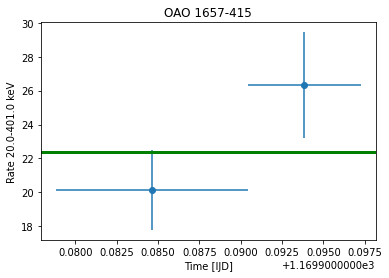

In [8]:
image_product = OdaLightCurve(data_collection)
img_fn = image_product.get_image_for_gallery( in_source_name=source_name)

fits_file_fn = image_product.write_fits(source_name=source_name)[0]

notebook_link='https://github.com/oda-hub/oda_api/blob/master/doc/source/user_guide/UploadToGallery.ipynb'

insert_new_source=False
force_insert_not_valid_new_source=False
validate_source=True
apply_fields_source_resolution=True
                                             
d = disp.post_data_product_to_gallery(token=token,
                                      RA=RA, DEC=DEC, e1_kev=E1_keV, e2_kev=E2_keV,
                                      product_title=source_name,
                                      gallery_image_path=img_fn,
                                      fits_file_path=[fits_file_fn],
                                       src_name=source_name,
                                      validate_source=validate_source,
                                      insert_new_source=insert_new_source,
                                      apply_fields_source_resolution=apply_fields_source_resolution,
                                      force_insert_not_valid_new_source=force_insert_not_valid_new_source,
                                      instrument=instrument,
                                      product_type=product_type,
                                      produced_by=notebook_link,
                                      observation_id=source_name + '_' + tstart + '_' + tstop
                                     )